# Weather

Data Source: https://www.kaggle.com/kimjihoo/coronavirusdataset

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

weather_df = pd.read_csv('./data/Weather.csv', index_col=['date','province'])
prov_df = pd.read_csv('./data/TimeProvince.csv', index_col=['date','province'])
prov_df.drop('time', inplace=True, axis=1)

prov_df = prov_df.reset_index().sort_values(by=['date','province']).set_index(['date','province'])

prov_df['confirmed_day'] = prov_df['confirmed'].diff(periods=17)
prov_df['released_day'] = prov_df['released'].diff(periods=17)
prov_df['deceased_day'] = prov_df['deceased'].diff(periods=17)

prov_df['con_day_shft'] = prov_df['confirmed_day'].shift(periods=-17*6)  # Takes on average 6-days for symptoms to appear
prov_df['rel_day_shft'] = prov_df['released_day'].shift(periods=-17*14)  # Released on average 2weeks after
prov_df['dec_day_shft'] = prov_df['deceased_day'].shift(periods=-17*14)  # Sever symptoms appear 10 days later assume 4 add. days

# NOTE: Weather doesn't have Sejong but Province does
df = pd.merge(weather_df,prov_df, right_index=True,left_index=True)
df

code  avg_temp  min_temp  max_temp  \
date       province                                                
2020-01-20 Seoul             10000       0.7      -3.3       5.5   
           Busan             11000       5.1       1.6       9.8   
           Daegu             12000       4.6       2.4       8.1   
           Gwangju           13000       4.0       1.2       7.9   
           Incheon           14000       1.2      -2.1       5.1   
...                            ...       ...       ...       ...   
2020-06-29 Jeollabuk-do      50000      22.0      19.7      26.5   
           Jeollanam-do      51000      21.9      20.0      24.0   
           Gyeongsangbuk-do  60000      20.4      17.4      24.5   
           Gyeongsangnam-do  61000      21.9      18.8      25.5   
           Jeju-do           70000      23.2      19.1      27.6   

                             precipitation  max_wind_speed  \
date       province                                          
2020-01-20 Seoul                       0.0             5.7   
           Busan                       0.0             6.1   
           Daegu                       0.0             6.4   
           Gwangju                     0.0             3.3   
           Incheon                     0.0             8.6   
...                                    ...             ...   
2020-06-29 Jeollabuk-do               27.6             4.4   
           Jeollanam-do               80.5            16.8   
           Gyeongsangbuk-do           43.9             4.5   
           Gyeongsangnam-do           98.9             5.8   
           Jeju-do                    25.1            12.8   

                             most_wind_direction  avg_relative_humidity  \
date       province                                                       
2020-01-20 Seoul                           270.0                   46.8   
           Busan                           270.0                   45.6   
           Daegu                           290.0                   44.1   
           Gwangju                         270.0                   63.1   
           Incheon                         320.0                   56.0   
...                                          ...                    ...   
2020-06-29 Jeollabuk-do                     90.0                   85.1   
           Jeollanam-do                     90.0                   97.9   
           Gyeongsangbuk-do                160.0                   90.9   
           Gyeongsangnam-do                160.0                   85.0   
           Jeju-do                         270.0                   87.4   

                             confirmed  released  deceased  confirmed_day  \
date       province                                                         
2020-01-20 Seoul                     0         0         0            NaN   
           Busan                     0         0         0            NaN   
           Daegu                     0         0         0            NaN   
           Gwangju                   0         0         0            NaN   
           Incheon                   1         0         0            NaN   
...                                ...       ...       ...            ...   
2020-06-29 Jeollabuk-do             27        21         0            1.0   
           Jeollanam-do             24        19         0            1.0   
           Gyeongsangbuk-do       1388      1328        54            1.0   
           Gyeongsangnam-do        134       128         0            1.0   
           Jeju-do                  19        16         0            0.0   

                             released_day  deceased_day  con_day_shft  \
date       province                                                     
2020-01-20 Seoul                      NaN           NaN           0.0   
           Busan                      NaN           NaN           0.0   
           Daegu                      NaN           NaN           0.

In [2]:
def create_splom(cols):
    axes = scatter_matrix(df[cols], alpha = 0.2, figsize = (18,18), diagonal = 'kde')

    # Add correlation to each cell - Thanks Tim!
    corr = df[cols].corr().to_numpy()
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    
    return axes

### Look for correlations in 'by-day' counts
Let's see if weather played a role in the daily deltas

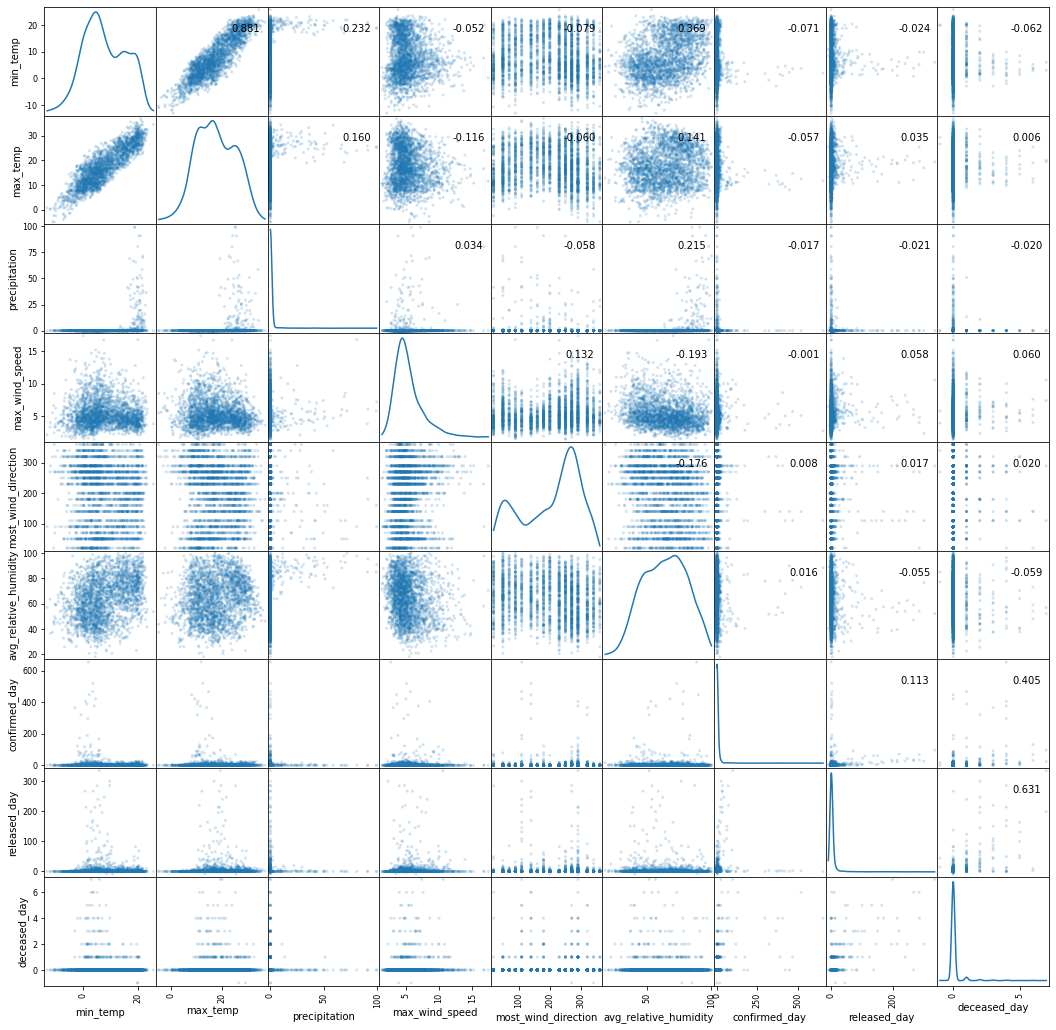

In [3]:
cols=['min_temp', 'max_temp', 'precipitation', 'max_wind_speed',
      'most_wind_direction', 'avg_relative_humidity', 'confirmed_day', 
      'released_day', 'deceased_day']

axes = create_splom(cols)

### Look for correlations in shifted day counts
Let's see if we can determine if the weather played a role in transmission by looking back in time.

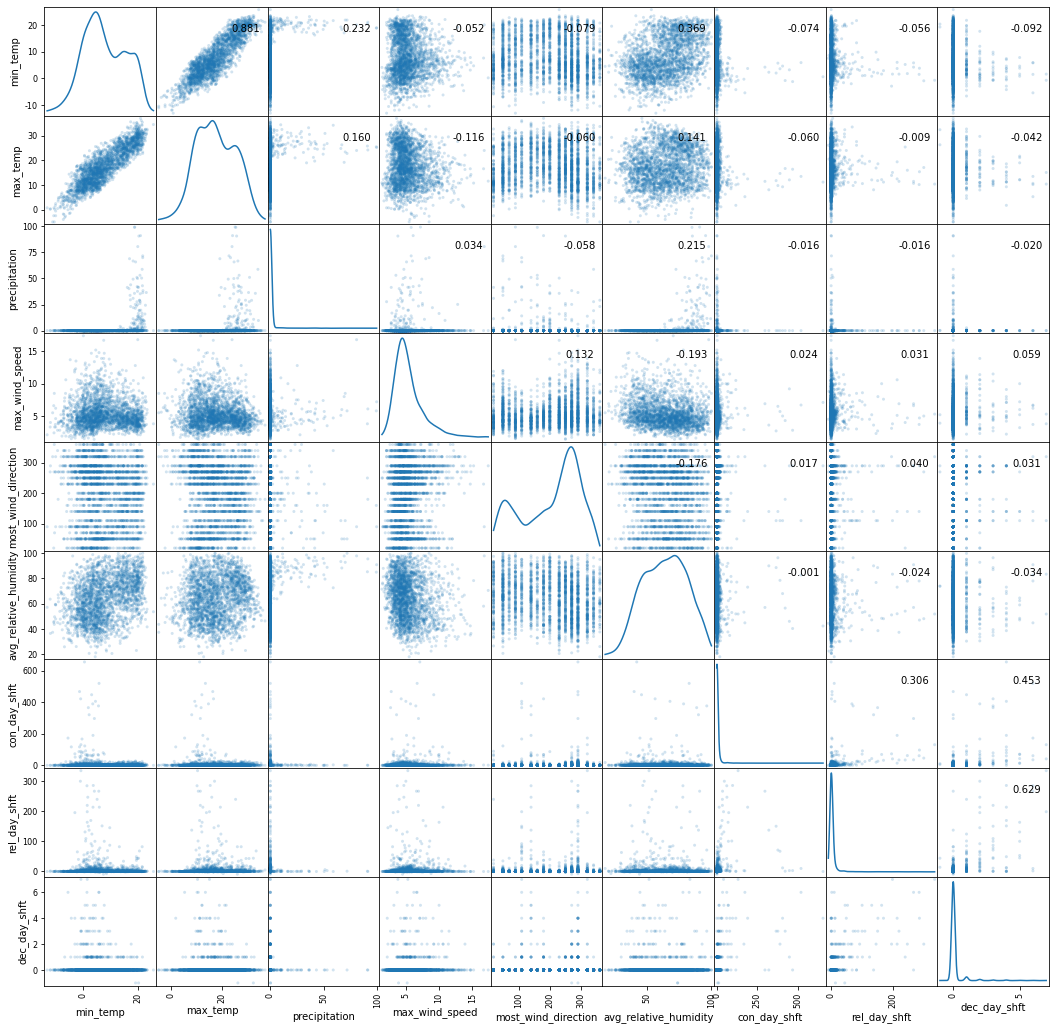

In [4]:
cols=['min_temp', 'max_temp', 'precipitation', 'max_wind_speed',
      'most_wind_direction', 'avg_relative_humidity', 'con_day_shft', 'rel_day_shft',
      'dec_day_shft']

axes = create_splom(cols)